# Data Wrangling and Analyzing Project: WeRateDogs Twitter Data

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import wptools
import os
import matplotlib.pyplot as plt
%matplotlib inline
import json
import tweepy
from timeit import default_timer as timer

# Gather Data

### 1. Twitter archive data:¶


In [22]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')

### 2. Tweet image prediction data:

In [23]:
# Download and save using the Requests library and the following URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [24]:
img_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### 3. Retweet & favorite count data:

In [27]:
# Converting relevant JSON data to dataframe
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        tweets_dict['tweet_id'] = tweets_json['id_str'] # should take 'id_str': 
                                # https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [28]:
tweets_df = pd.DataFrame(tweets_list)

# Assess Data: Quality and Tidiness

## 1. Inspect datasets:

### Twitter archive data:

In [29]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [31]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [32]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [116]:
twitter_arc_clean.tweet_id.duplicated().sum()

0

In [33]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [34]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [35]:
twitter_archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [36]:
print(twitter_archive.doggo.value_counts(),'\n')
print(twitter_archive.floofer.value_counts(), '\n')
print(twitter_archive.pupper.value_counts(), '\n')
print(twitter_archive.puppo.value_counts(), '\n')

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 



In [37]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Mimosa       1
Miguel       1
Ralphé       1
Shooter      1
Sweets       1
Name: name, Length: 957, dtype: int64

In [197]:
twitter_arc_clean[twitter_arc_clean.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
twitter_archive.in_reply_to_status_id.notnull().sum()

78

In [39]:
twitter_archive.retweeted_status_id.notnull().sum()

181

In [40]:
twitter_archive[twitter_archive.retweeted_status_id.notnull() | twitter_archive.in_reply_to_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None


In [41]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Image prediction data:

In [42]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [45]:
img_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### Retweet/favorite count data:

In [46]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [47]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [48]:
tweets_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [49]:
tweets_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [50]:
all_columns = pd.Series(list(twitter_archive) + list(img_predictions) + list(tweets_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## 2. Quality issues:

### *`twitter_archive` table*
- Erroneous datatypes
    - ID fields, like "tweet_id", "in_reply_to_status_id", "retweeted_status_id", etc. should be objects, not integers or floats.
    - timestamp fields should be datetimes, not strings.
    - "rating_denominator" and "rating_numerator" columns should be floats, not integers.
    - "retweet_count" and "favorite_count" should be integers, not floats.
- The "rating_denominator" and "rating_numerator" columns should be correctly extracted.
- Lowercase names of *such, a, an, the, just, etc*, which are not actual names and should be change to None.
- Nulls represented as string "None" in the dog-stage columns (i.e. "doggo", "floofer", "pupper", "puppo").
- Drop unnecessary rows and columns (i.e. all rows with 181 retweets and 78 tweet replies, and all "reply" and "retweet" related columns). 


### *`img_predictions` table*
- "tweet_id" is a string, not an integer.
- In "p1_dog" column, there are "False" values (i.e. the #1 prediction is NOT a breed of dog). The rows related to those "False" values will be removed.
- The "p1" and "p1_conf" columns will be renamed with more explanatory titles.
- Mixed lowercase and capitalized first letter in breeds of dog in p1 column. Lowercase all.
- The confident levels of the algorithms #2 and #3 ("p2_conf" & "p3_conf") are very low. Thus, all "p2" and "p3" related columns will be removed. 
- Keep only the most likely prediction ("p1") in my analysis.
- After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.
- The column "jpg_url" provides the same image urls with the "expanded_urls" in the twitter archive data.

### *`tweets_df` table*
- Not any as tweet_id is object, retweet_count and favorite_count are int64.

## 3. Tidiness issues:

- In the ***`twitter_archive`*** table , "doggo", "floofer", "pupper", and "puppo" should be in the long format, instead of the wide format.
- "tweet_id" column in the ***`tweets_df`*** is duplicated in ***`twitter_archive`*** and ***``img_predictions``*** tables.
- Thus, merge three tables into a master dataset based on duplicated "tweet_id".

# Clean Data:

In [271]:
twitter_arc_clean = twitter_archive.copy()
img_pred_clean = img_predictions.copy()
tweets_df_clean = tweets_df.copy()

## Quality

### 1. Twitter archive data:

#### Erroneous datatypes
- ID fields, like "tweet_id", "in_reply_to_status_id", "retweeted_status_id", etc. should be objects, not integers or floats.
- timestamp fields should be a datetime, not a string.
- "rating_denominator" and "rating_numerator" columns should be floats, not integers.
- "retweet_count" and "favorite_count" should be integers, not floats.

##### Define
- Convert ID fields, like "tweet_id", "in_reply_to_status_id", "retweeted_status_id", etc. to strings/objects.
- Convert timestamp fields to datetimes.
- Convert "rating_denominator" and "rating_numerator" to floats.
- Convert "retweet_count" and "favorite_count" to integers.

##### Code

In [272]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [273]:
twitter_arc_clean = twitter_arc_clean.astype({'tweet_id':'object', 'in_reply_to_status_id':'object',
                                             'in_reply_to_user_id':'object', 'retweeted_status_id':'object',
                                             'retweeted_status_user_id':'object', 'timestamp':'datetime64[ns, UTC]',
                                             'retweeted_status_timestamp':'datetime64[ns, UTC]', 
                                             'rating_numerator':'float64','rating_denominator':'float64'})

##### Test

In [274]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

#### The "rating_denominator" and "rating_numerator" columns should be correctly extracted.
##### Define
- Extract correct values for "rating_denominator" and "rating_numerator" from the original texts using a regex.
- Replace rating columns in twitter_archive table with these two correctly extracted "rating_denominator" and "rating_numerator".

##### Code

In [275]:
rating = twitter_arc_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [276]:
twitter_arc_clean[['rating_numerator', 'rating_denominator']] = rating[['rating_numerator', 'rating_denominator']]
twitter_arc_clean = twitter_arc_clean.astype({'rating_numerator':'float64','rating_denominator':'float64'})

##### Test

In [277]:
twitter_arc_clean.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_numerator, dtype: int64

In [279]:
twitter_arc_clean.rating_denominator.value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

#### After extracting and replacing the new values for 'rating_numerator', 'rating_denominator', I mannually checked 23 entries with  'rating_denominator' != 10 in Excel and found out that there are 5 cases that were not extracted correctly using the above regex.
- It is because that those texts have other numbers, which have the same format as the rating format (i.e. x/y), mentioned before the ratings. 
    - "I know you're excited but **960/00** isn't a valid rating, **13/10** is tho"
    - "Happy **4/20** from the squad! **13/10** for all"
    - "This is Bluebert. He just saw that both #FinalFur match ups are split **50/50**. Amazed af. **11/10**"
    - "This is Darrel. He just robbed a **7/11** and is in a high speed police chase. Was just spotted by the helicopter **10/10**"
    - "This is an Albanian 3 **1/2** legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. **9/10**"

##### Define
- Correct 5 cases where the regex wrongly extract with the right ratings.

##### Code

In [280]:
wrong_vals = [(960,0), (4,20), (50,50), (7,11), (1,2)]
correct_vals = [(13,10), (13,10), (11,10), (10,10), (9,10)]

In [281]:
for w, c in zip(wrong_vals, correct_vals):
    index = twitter_arc_clean.query('(rating_numerator == {}) & (rating_denominator == {})'.format(w[0],w[1])).index.tolist()
    print(index)
    for i in index:
        twitter_arc_clean.loc[i, 'rating_numerator'] = c[0]
        twitter_arc_clean.loc[i, 'rating_denominator'] = c[1]

[313]
[1165, 1598]
[1202]
[1662]
[2335]


##### Test

In [282]:
for w, c in zip(wrong_vals, correct_vals):
    index = twitter_arc_clean.query('(rating_numerator == {}) & (rating_denominator == {})'.format(w[0],w[1])).index.tolist()
    print(index)

[]
[]
[]
[]
[]


In [283]:
twitter_arc_clean.rating_denominator.value_counts()

10.0     2339
50.0        2
80.0        2
11.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
40.0        1
7.0         1
15.0        1
Name: rating_denominator, dtype: int64

####  Lowercase names of *such, a, an, the, just, etc.*, which are not actual names and should be change to None.
##### Define
- Replace the lowercase names with None using a regex.

##### Code

In [284]:
twitter_arc_clean.name = twitter_arc_clean.name.str.replace(r'(^[a-z]+$)', 'None')

##### Test

In [285]:
twitter_arc_clean[twitter_arc_clean.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [286]:
twitter_arc_clean.name.value_counts()

None       854
Charlie     12
Cooper      11
Lucy        11
Oliver      11
          ... 
Ralphé       1
Shooter      1
Ben          1
Ralf         1
Dug          1
Name: name, Length: 932, dtype: int64

#### Nulls represented as string "None" in the dog-stage columns (i.e. "doggo", "floofer", "pupper", "puppo").
*Note: This will be corrected in the Tidiness part, where I will change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.*

#### Drop unnecessary rows and columns (i.e. all rows with 181 retweets and 78 tweet replies, and all "reply" and "retweet" related columns). 

##### Define
- Remove 181 retweets and 78 tweet replies.

##### Code

In [287]:
twitter_arc_clean.drop(twitter_arc_clean[twitter_arc_clean.retweeted_status_id.notnull() | twitter_arc_clean.in_reply_to_status_id.notnull()].index, 
                       inplace = True)

##### Test

In [288]:
twitter_arc_clean.retweeted_status_id.notnull().sum()

0

In [289]:
twitter_arc_clean.in_reply_to_status_id.notnull().sum()

0

In [290]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

##### Define
- Drop all unnecessary retweeted and reply related columns

##### Code

In [291]:
drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',\
             'retweeted_status_user_id', 'retweeted_status_timestamp']

twitter_arc_clean.drop(columns = drop_cols, inplace= True)

##### Test

In [292]:
list(twitter_arc_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### 2. Image prediction data:

#### "tweet_id" is a string, not an integer.

##### Define
- Convert tweet_id to string type

##### Code

In [293]:
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype('str')

##### Test

In [294]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### In "p1_dog" column, there are "False" values (i.e. the #1 prediction is NOT a breed of dog). 

##### Define
- Drop the rows where p1_dog is "False" (i.e. keep only entries where the #1 prediction is a breed of dog). 

##### Code

In [295]:
img_pred_clean.drop(img_pred_clean.query('p1_dog == False').index, inplace=True)

##### Test

In [296]:
img_pred_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### Mixed lowercase and capitalized first letter in breeds of dog in p1 column.

##### Define
- Capitalize the first letter for all predicting breeds in p1 column.

##### Code

In [297]:
img_pred_clean.p1 = img_pred_clean.p1.str.title()

##### Test

In [298]:
img_pred_clean.p1.value_counts()

Golden_Retriever      150
Labrador_Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Japanese_Spaniel        1
Standard_Schnauzer      1
Scotch_Terrier          1
Silky_Terrier           1
Clumber                 1
Name: p1, Length: 111, dtype: int64

#### The "p1" and "p1_conf" columns will be renamed with more explanatory titles.

##### Define
- Rename 'p1' to 'dog_breed_prediction', 'p1_conf' to 'prediction_confidence'

##### Code

In [299]:
img_pred_clean.rename(columns= {'p1':'dog_breed_pred', 'p1_conf':'pred_confidence'}, inplace=True)

##### Test

In [300]:
list(img_pred_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'dog_breed_pred',
 'pred_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### The prediction confident levels of the algorithms #2 and #3 ("p2_conf" & "p3_conf") are very low. After removal of "False" entries, the "p1_dog" column no longer adds any valuable information. The column "jpg_url" provides the same image urls with the "expanded_urls" in the twitter archive data.

##### Define
- Remove all "p2" and "p3" related columns and keep only the most likely prediction ("p1") for further analysis.
- Remove "p1_dog" column as it provides no useful information.
- Remove "jpg_url" column.

##### Code

In [301]:
preds_drop_cols = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

img_pred_clean.drop(columns= preds_drop_cols, inplace=True)

##### Test

In [302]:
list(img_pred_clean)

['tweet_id', 'img_num', 'dog_breed_pred', 'pred_confidence']

In [303]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1532 non-null   object 
 1   img_num          1532 non-null   int64  
 2   dog_breed_pred   1532 non-null   object 
 3   pred_confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 59.8+ KB


## Tidiness

#### In the ***`twitter_archive`*** table , "doggo", "floofer", "pupper", and "puppo" should be in the long format, instead of the wide format.
##### Define
- Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format into one column named "dog_stage".

##### Code

In [304]:
# Reset index
twitter_arc_clean.reset_index(drop=True, inplace=True)

In [305]:
# Replace all None values
twitter_arc_clean.replace('None', np.nan, inplace = True)
twitter_arc_clean.fillna('', inplace=True)

In [306]:
twitter_arc_clean['dog_stage'] = twitter_arc_clean[['doggo', 'floofer', 'pupper', 'puppo']].sum(axis=1).astype(str)

In [307]:
twitter_arc_clean.dog_stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [308]:
# Check case index where it has multiple dog stages
multi_stage_index = twitter_arc_clean.query('dog_stage == ["doggopupper", "doggopuppo","doggofloofer"]').index.tolist()
multi_stage_index

[154, 161, 358, 416, 446, 536, 562, 689, 748, 848, 897]

In [309]:
# From the multiple satge list above, there are 11 cases with the stage of more than two categories.
# I will go through each of them and adjust to the correct stage.
# If there are more than one dogs in a tweet, I will add a new stage category called "multiple".

for i in multi_stage_index:
    print('{}: {}'.format(i,twitter_arc_clean.dog_stage[i]))
    print(twitter_arc_clean.tweet_id[i])
    print(twitter_arc_clean.text[i])
    print(twitter_arc_clean.expanded_urls[i])
    print()

154: doggopuppo
855851453814013952
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
https://twitter.com/dog_rates/status/855851453814013952/photo/1

161: doggofloofer
854010172552949760
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1

358: doggopupper
817777686764523521
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
https://twitter.com/dog_rates/status/817777686764523521/video/1

416: doggopupper
808106460588765185
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet 

In [310]:
# Case 154: doggopuppo, correcting to: puppo
# Case 161: doggofloofer, correcting to: floofer
# Case 358: doggopupper, correcting to: pupper
# Case 416: doggopupper, correcting to: multiple
# Case 446: doggopupper, correcting to: pupper 
# Case 536: doggopupper, correcting to: doggo
# Case 562: doggopupper, correcting to: multiple
# Case 689: doggopupper, correcting to: multiple
# Case 748: doggopupper, correcting to: doggo
# Case 848: doggopupper, correcting to: multiple
# Case 897: doggopupper, correcting to: multiple

# After inspecting each case, I will update to the correct stage 
# (i.e. doggo/floofer/pupper/puppo or multiple) by running loop
correct_stage = ['puppo', 'floofer', 'pupper', 'multiple', 'pupper', 'doggo', 'multiple', 'multiple', 'doggo','multiple', 'multiple']

for i, j in zip(multi_stage_index, correct_stage):
    twitter_arc_clean.loc[i, 'dog_stage'] = j

In [311]:
# Drop original dog category columns (i.e. "doggo", "floofer", "pupper", and "puppo")
drop_cats = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_arc_clean.drop(drop_cats,1, inplace=True)

##### Test

In [312]:
twitter_arc_clean.replace('', 'None', inplace = True)

In [313]:
twitter_arc_clean.dog_stage.value_counts()

None        1761
pupper       223
doggo         74
puppo         24
floofer       10
multiple       5
Name: dog_stage, dtype: int64

#### "tweet_id" column in the ***`tweets_df`*** is duplicated in ***`twitter_archive`*** and ***`img_predictions`*** tables.

##### Define
- Thus, merge three tables into a master dataset based on duplicated ``"tweet_id"``.

##### Code

In [315]:
twitter_arc_clean.tweet_id = twitter_arc_clean.tweet_id.astype('str')

In [317]:
# Merging dataframes to create a master dataframe 

master_df_temp = pd.merge(twitter_arc_clean, img_pred_clean, on = 'tweet_id', how = 'left')
master_df = pd.merge(master_df_temp, tweets_df_clean, on = 'tweet_id', how = 'left')

##### Test

In [318]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,img_num,dog_breed_pred,pred_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,1.0,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,1.0,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,2.0,Basset,0.555712,9774,41048


In [319]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   dog_stage           2097 non-null   object             
 9   img_num             1463 non-null   float64            
 10  dog_breed_pred      1463 non-null   object             
 11  pred_confidence     1463 non-null   float64            
 12  retweet_count       2097 non-null 

Data cleaning has been done! And the data type looks fine

# Store the clean datasets

In [320]:
# Save dataframe to csv
master_df.to_csv('twitter_archive_master.csv', encoding= 'utf-8', index = False)
twitter_arc_clean.to_csv('clean_twitter_archive_data.csv', encoding= 'utf-8', index = False)
img_pred_clean.to_csv('clean_image_prediction_data.csv', encoding= 'utf-8', index = False)
tweets_df_clean.to_csv('clean_retweet_fav_data.csv', encoding= 'utf-8', index = False)

# Analyze and Visualize Data

### Basic descriptive statistics

In [321]:
master_df = pd.read_csv('twitter_archive_master.csv')

In [322]:
master_df.describe().round(3)

,tweet_id,rating_numerator,rating_denominator,img_num,pred_confidence,retweet_count,favorite_count
count,2.097000e+03,2097.000,2097.000,1463.000,1463.000,2097.000,2097.000
mean,7.365594e+17,12.139,10.428,1.213,0.615,2841.668,8980.902
std,6.710178e+16,40.329,6.583,0.574,0.260,4709.238,12199.637
min,6.660209e+17,0.000,7.000,1.000,0.044,16.000,81.000
25%,6.768197e+17,10.000,10.000,1.000,0.393,644.000,2046.000
50%,7.098528e+17,11.000,10.000,1.000,0.616,1405.000,4196.000
75%,7.877176e+17,12.000,10.000,1.000,0.853,3285.000,11416.000
max,8.924206e+17,1776.000,170.000,4.000,1.000,79515.000,132810.000


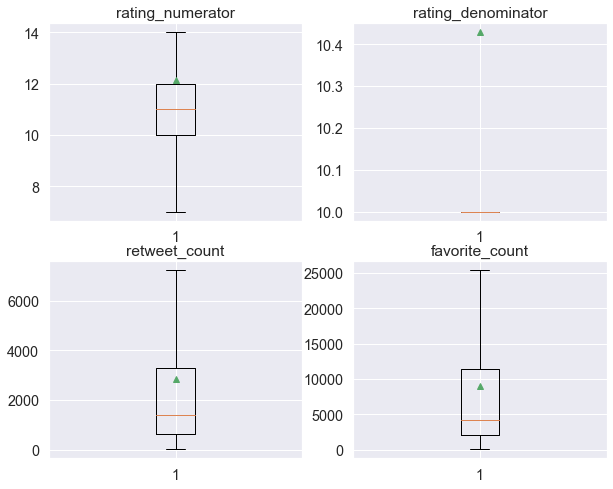

In [410]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0, 0].boxplot(master_df.rating_numerator,  0, '', showmeans=12.139)
axs[0, 0].set_title('rating_numerator')

axs[0, 1].boxplot(master_df.rating_denominator,  0, '', showmeans=10.428)
axs[0, 1].set_title('rating_denominator')

axs[1, 0].boxplot(master_df.retweet_count,  0, '',showmeans=2841.668)
axs[1, 0].set_title('retweet_count')

axs[1, 1].boxplot(master_df.favorite_count,  0, '',  showmeans=8980.902)
axs[1, 1].set_title('favorite_count')

plt.show()

#### Analyses:
- The median and mean rating are around 11 and 12.14 respectively
- The median and mean retweet count are around 1405 and 2842 respectively
- The median and mean favorite count are 4196 and 8981 respectively

### Visualization 1: Correlation heatmap

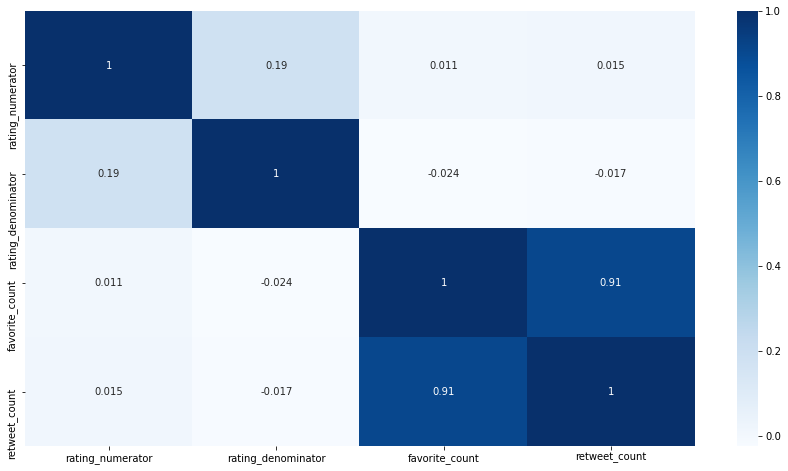

In [324]:
# Correlation heatmap
corr = master_df[['rating_numerator', 'rating_denominator','favorite_count','retweet_count','dog_breed_pred']].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap = 'Blues');

#### Analyses:
- Strong correlation between the number of favorites and retweets, which is expected.
- No correlation between dog ratings and the number of retweets/favorites.

### Visualization 2: Scatter plot between retweet_count and favorite_count

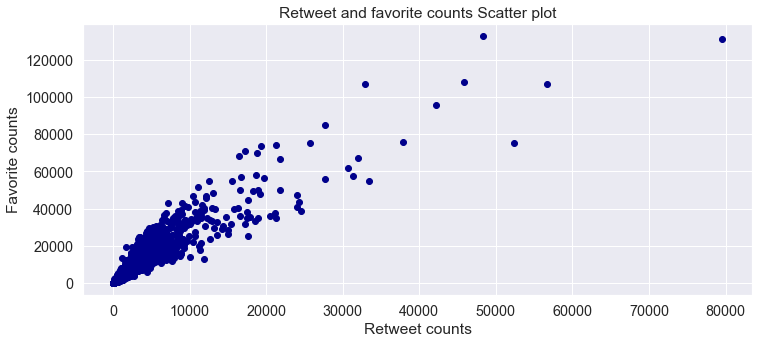

In [340]:
# Scatter plot showing relationship between retweet_count and favorite_count
plt.scatter(master_df.retweet_count, master_df.favorite_count, c='darkblue')
plt.xlabel('Retweet counts')
plt.ylabel('Favorite counts')
plt.title('Retweet and favorite counts Scatter plot');

#### Analyses:
- As expected there is a strongly positivie correlation (+0.9; shown by correlation heat map) between the number of retweets and favorites.

### Visualization 3: Ratings distributions

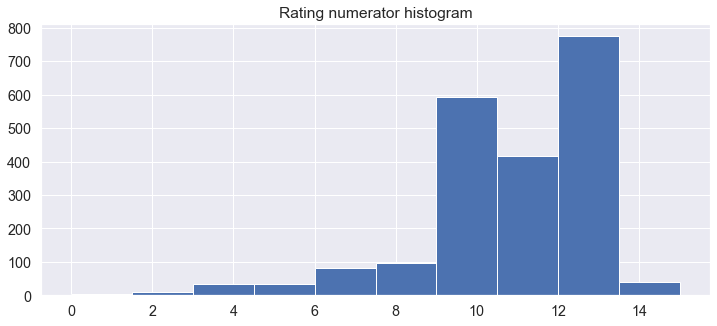

In [426]:
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.3)
master_df.rating_numerator.hist(range=(0,15))
plt.title('Rating numerator histogram');

#### Analyses:
- 

In [415]:
boot_means = []
for _ in range(10000):
    bootsamp = master_df.sample(master_df.shape[0], replace = True)
    boot_mean = bootsamp.rating_numerator.mean()
    boot_means.append(boot_mean)

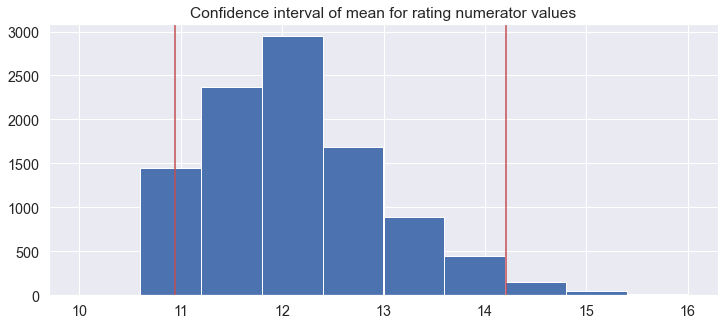

In [427]:
plt.hist(boot_means, range=(10,16))
plt.title('Confidence interval of mean for rating numerator values')
plt.axvline(x = 10.943494635193131 , color='r');
plt.axvline(x = 14.202638412017167 , color='r');

In [413]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(10.943494635193131, 14.202638412017167)

#### Analyses:
- The rating numerator histogram is skewed to the left. 
- The confidence interval and with the certainty 95% we can say that the mean value of the numerator will be in between 11 and 14.

### Visualization 4: Life stages of dog

In [424]:
# The list of four main stages of dog life and their tweet counts
master_df.dog_stage.value_counts()

None        1761
pupper       223
doggo         74
puppo         24
floofer       10
multiple       5
Name: dog_stage, dtype: int64

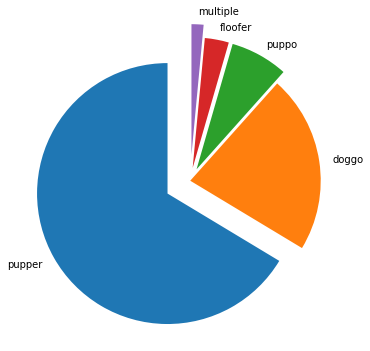

In [328]:
# Pie chart of dog stages
dog_stage_count = master_df.dog_stage.value_counts()[1:].values.tolist()
dog_stage_list = master_df.dog_stage.value_counts()[1:].index.tolist()
explode = (0.2, 0, 0.1, 0.1, 0.2) 

figure1, axis1 = plt.subplots(figsize=(6, 6))
axis1.pie(dog_stage_count, labels = dog_stage_list,  explode = explode, startangle = 90);


#### Analyses:
- Dogs in ***pupper*** stage of dog life cycle get most tweets, which is expected as they are adorable.

### Visualization 5: Most common predicted breeds of dog

In [428]:
master_df.dog_breed_pred.value_counts()

Golden_Retriever      137
Labrador_Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
                     ... 
Silky_Terrier           1
Japanese_Spaniel        1
Groenendael             1
Standard_Schnauzer      1
Clumber                 1
Name: dog_breed_pred, Length: 111, dtype: int64

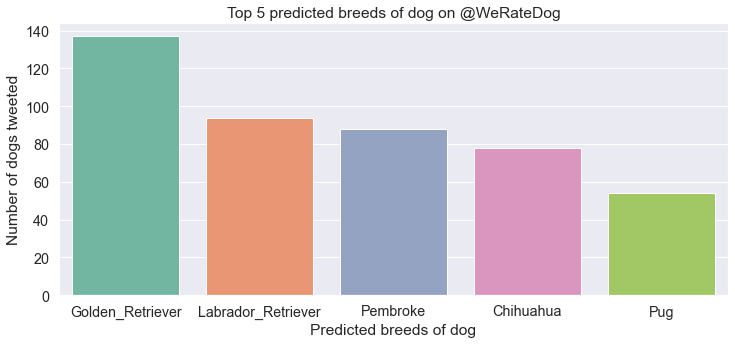

In [329]:
# Barchart of top 5 breeds of dogs based on image predictions

most_breeds_list = master_df.dog_breed_pred.value_counts()[:5].index.tolist()
most_breeds_count= master_df.dog_breed_pred.value_counts()[:5].values.tolist()

sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.3)
ax = sns.barplot(x = most_breeds_list ,y = most_breeds_count, palette="Set2")    
ax.set(xlabel='Predicted breeds of dog', ylabel='Number of dogs tweeted', title = 'Top 5 predicted breeds of dog on @WeRateDog')
plt.show()

#### Analyses:
- The most popular dog, based on image predictions, is a Golden Retriever, followed by Labrodor Retriever and Pembroke. It is a mix of small and big dogs!

### Visualization 6: Most common names of dog

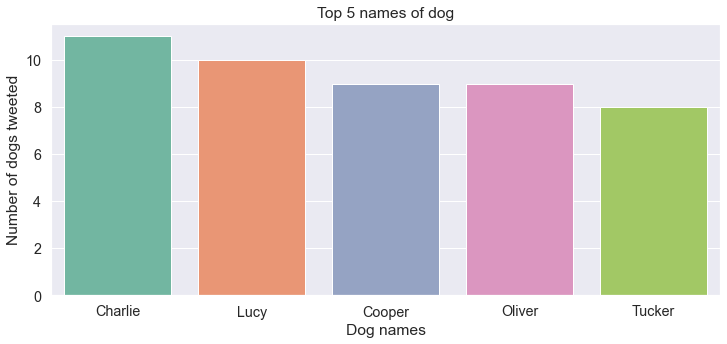

In [83]:
# Barchart of top 5 breeds of dogs based on image predictions
most_names_list = master_df.name.value_counts()[1:6].index.tolist()
most_names_count= master_df.name.value_counts()[1:6].values.tolist()

sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.3)
ax = sns.barplot(x = most_names_list ,y = most_names_count, palette="Set2")    
ax.set(xlabel='Dog names', ylabel='Number of dogs tweeted', 
       title = 'Top 5 names of dog')
plt.show()

#### Analyses:
- Top 5 dog names are Charlie, Lucy, Oliver, Cooper, and Tucker.

### Visualization 7: Retweet count and favourite count trends over time

In [84]:
# Convert timestamp to YYYY-MM-DD formart
master_df.timestamp = pd.to_datetime(master_df.timestamp)
master_df.timestamp = master_df.timestamp.map(lambda x: x.strftime('%Y-%m-%d'))
master_df.timestamp = pd.to_datetime(master_df.timestamp)

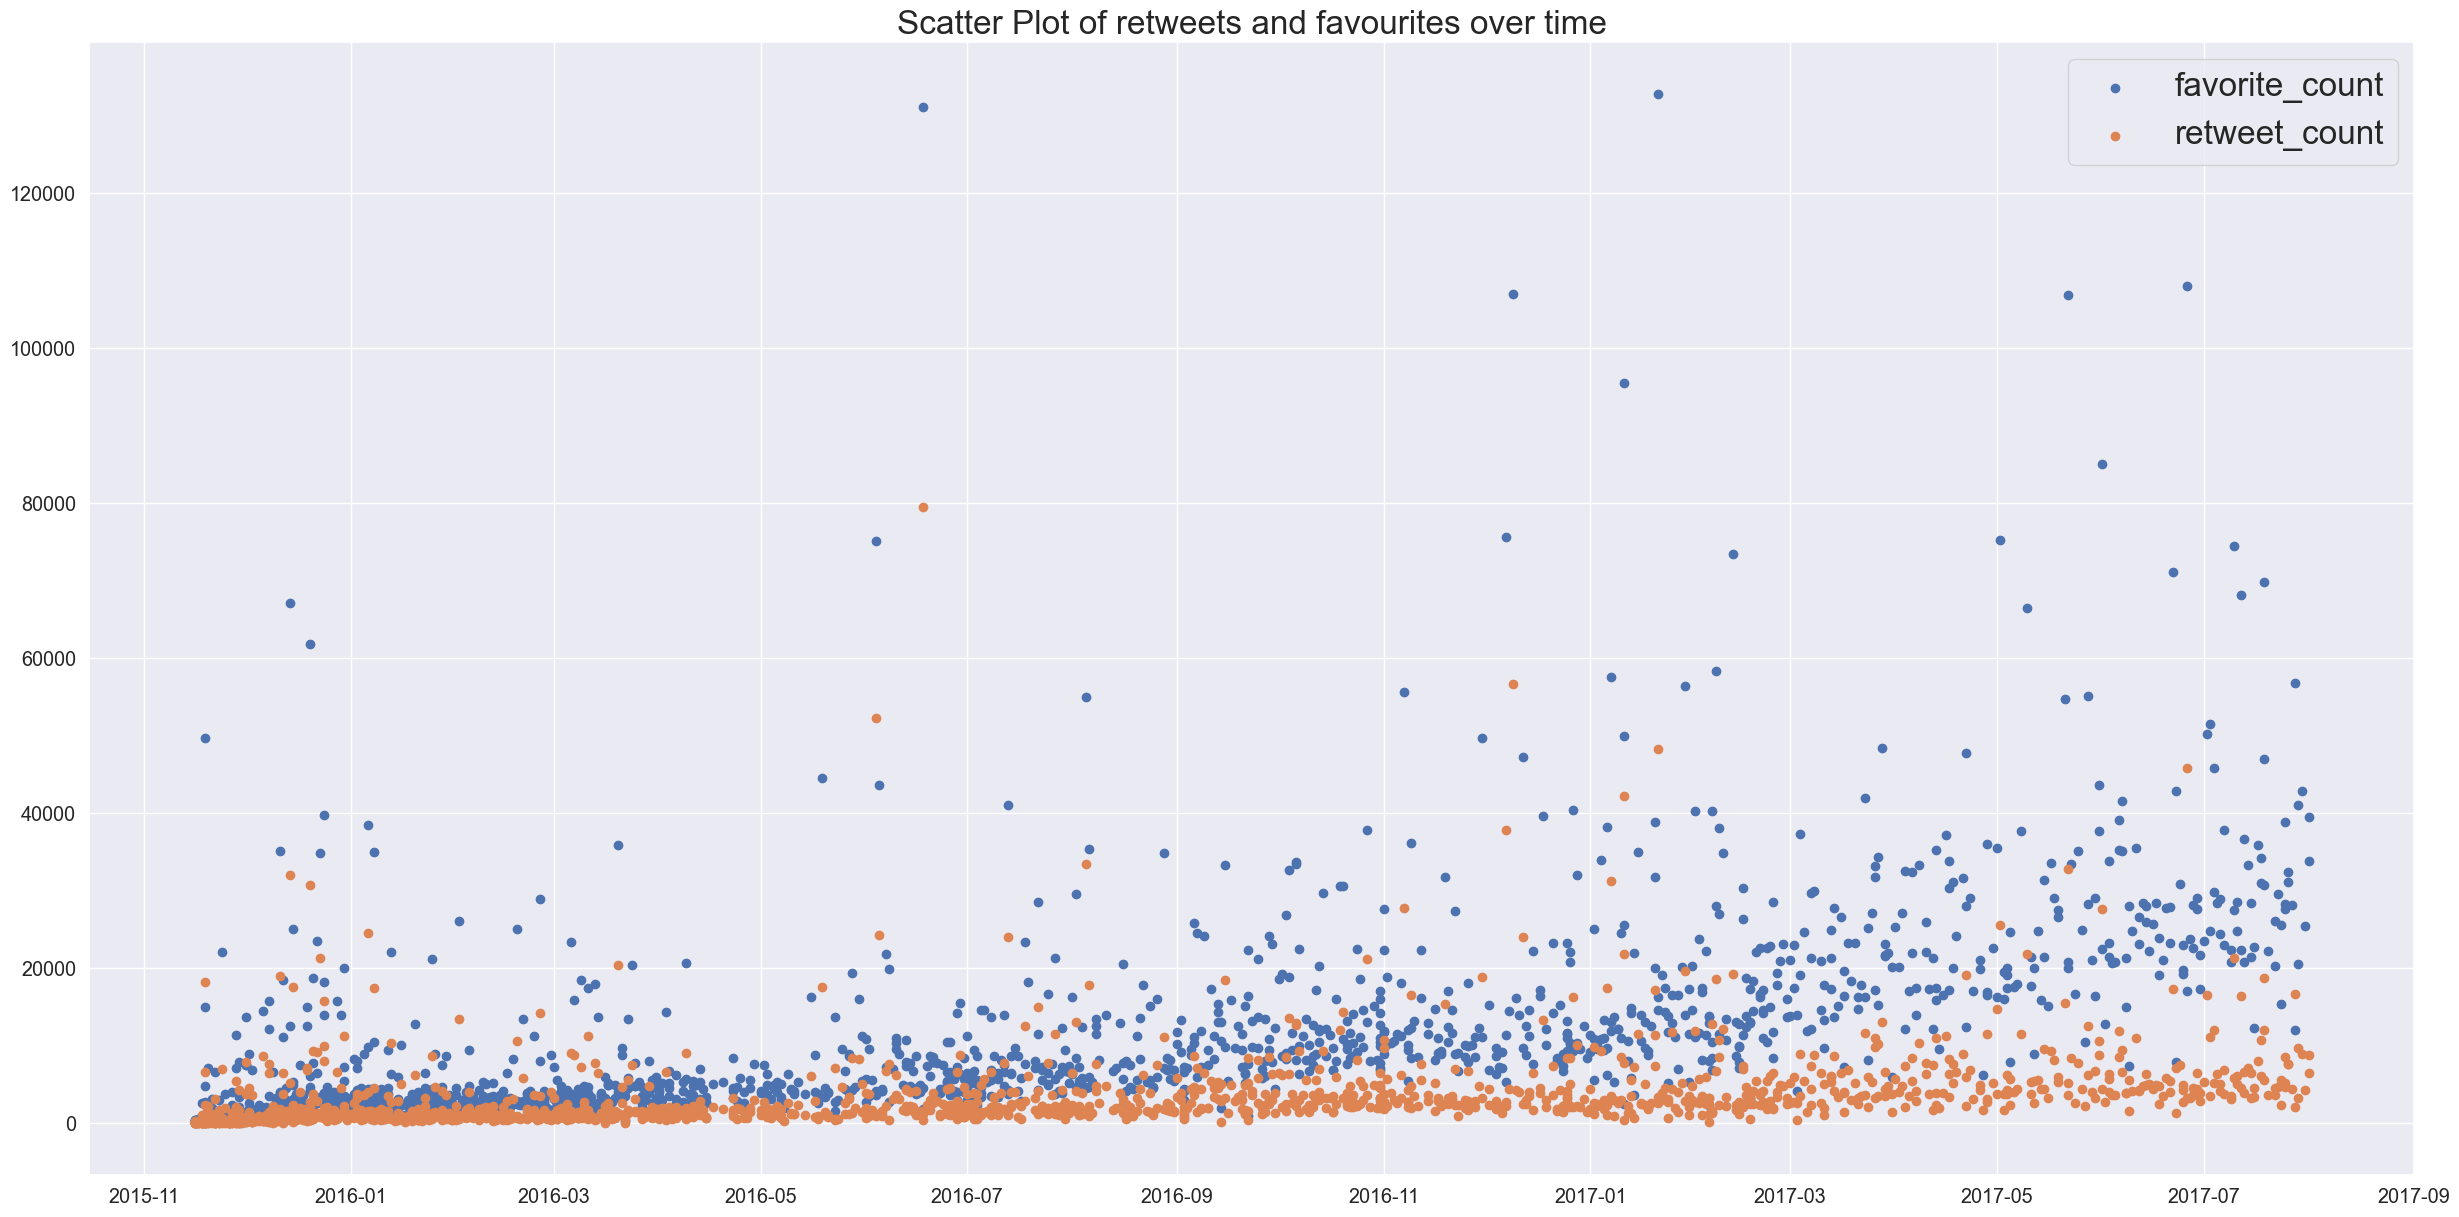

In [85]:
# Scatter Plot of retweets and favourites over time
plt.rcParams.update({'figure.figsize':(30,15), 'figure.dpi':100})
plt.scatter(master_df.timestamp, master_df.favorite_count, label= 'favorite_count')
plt.scatter(master_df.timestamp, master_df.retweet_count, label= 'retweet_count')
plt.title('Scatter Plot of retweets and favourites over time', fontsize=24)
plt.legend(fontsize=24)
plt.show();

#### Analyses:
- In the beginning, the favourite counts and the retweet counts are at a similar level, yet the number of tweets per time is more. As the 2016 and 2017 progress, the number of tweets per time decrease (seen via the density of blue and orange dots), but then the number of the favourite counts and retweet counts becomes higher and higher.
- Another trend noticed is that favourite counts seem to increase drastically going up to 120000 for a few tweets, yet the retweet counts remain less than 50000 for most of the time.

### Word Cloud with Tweets
One fun and easy way to visualize the texts from the tweets in our dataset is the word cloud as it shows the most frequently used words from the tweet texts and display in a customizable image. To illustrate the spirit of @WeRateDog Twitter account, I use dog paw print for the outline of the word cloud in this project.

In [86]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [87]:
master_copy = master_df.copy()

In [88]:
# Create a list with all the words that were tweeted in our DataFrame.
tweets = np.array(master_copy.tweet_text)
my_list = []
for tweet in tweets:
    my_list.append(tweet.replace(r'https://t.co/',''))

In [89]:
# Download an image of a paw print from the internet and 
# used it in the function below to generate a word cloud with the tweets.
mask = np.array(Image.open(requests.get('https://clipartix.com/wp-content/uploads/2016/10/Clipart-dog-paw-print-clipart-2-image-4.jpeg', stream=True).raw))
text = my_list

In [90]:
#  Function to generate a word cloud with the tweets
def gen_wc(text, mask):
    word_cloud = WordCloud(width = 500, height = 500, background_color='white', mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

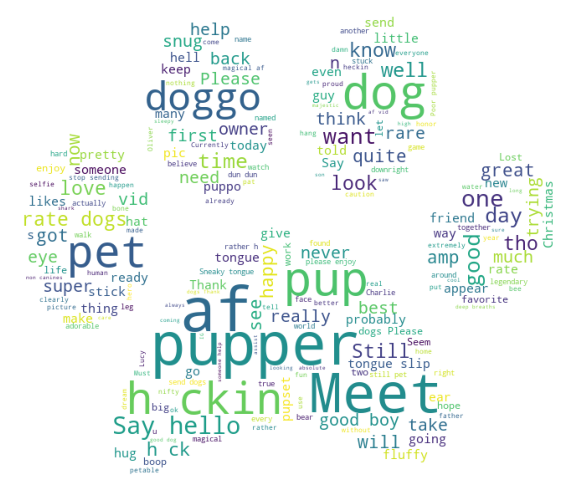

In [100]:
plt.rcParams.update({'figure.figsize':(30,20), 'figure.dpi':60})
gen_wc(text, mask)

#### Analyses:
- The larger the word, the more frequently it is used in the tweets in this dataset.
- From the word cloud, several most frequently words used in the tweet texts are *'pupper', 'dog', 'doggo', 'pup','pet', 'say hello', 'meet', and 'af'. 
- We can tell that the language used in these tweets are very 'doggy' (of course), fun, happy and casual. 

## Source:
- Reading and Writing JSON to a File in Python: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python
- Loading and parsing a JSON file with multiple JSON objects: https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects/12451465#12451465
- Handling Exceptions: https://wiki.python.org/moin/HandlingExceptions
- Twitter API - get tweets with specific id: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
-  Twitter API wrapper: https://docs.tweepy.org/en/v3.10.0/api.html
- Tweet Object: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
- Convert pandas dataframe from wide to long: https://stackoverflow.com/questions/45123924/convert-pandas-dataframe-from-wide-to-long
- How to reset index in a dataframe: https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe 
- Word cloud with tweets: https://www.kaggle.com/pulleyba/project-data-wrang
- How to Generate a Word Cloud of Any Shape in Python: https://blog.goodaudience.com/how-to-generate-a-word-cloud-of-any-shape-in-python-7bce27a55f6e
- Python Scatter Plot: https://www.machinelearningplus.com/plots/python-scatter-plot/